# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
# cria a coluna de faixa de latitude
sinasc['FAIXALATITUDE'] = sinasc['munResLat'].apply(lambda x: 'Acima de -10.5' if x > -10.5 else 'Abaixo de -10.5')

In [5]:
# aplica o groupby() nas colunas QTDFILVIVO e QTDFILMORT com o aggregate
sinasc.groupby('FAIXALATITUDE')[['QTDFILVIVO', 'QTDFILMORT']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

QTDFILVIVO                                                  \
                       sum      mean  min   max median       std       var   
FAIXALATITUDE                                                                
Abaixo de -10.5    12601.0  0.980012  0.0  30.0    1.0  1.138256  1.295626   
Acima de -10.5     14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674   

                QTDFILMORT                                                 
                       sum     mean  min   max median       std       var  
FAIXALATITUDE                                                              
Abaixo de -10.5     3106.0  0.24258  0.0  28.0    0.0  0.599444  0.359333  
Acima de -10.5      3538.0  0.29177  0.0   9.0    0.0  0.627856  0.394204

In [6]:
# dataframe aperfeiçoado através do pivot_table
sinasc.pivot_table(
    values=['QTDFILVIVO', 'QTDFILMORT'],
    index=['FAIXALATITUDE'],
    aggfunc={
        'QTDFILVIVO': [
            ("Soma", "sum"),
            ("Média", "mean"),
            ("Mínimo", "min"),
            ("Máximo", "max"),
            ("Mediana", "median"),
            ("Desvio Padrão", "std"),
            ("Variância", "var")
        ],
        'QTDFILMORT': [
            ("Soma", "sum"),
            ("Média", "mean"),
            ("Mínimo", "min"),
            ("Máximo", "max"),
            ("Mediana", "median"),
            ("Desvio Padrão", "std"),
            ("Variância", "var")
        ]
    },
    dropna=True
)

QTDFILMORT                                         \
                Desvio Padrão Mediana Máximo    Média Mínimo    Soma   
FAIXALATITUDE                                                          
Abaixo de -10.5      0.599444     0.0   28.0  0.24258    0.0  3106.0   
Acima de -10.5       0.627856     0.0    9.0  0.29177    0.0  3538.0   

                             QTDFILVIVO                                  \
                Variância Desvio Padrão Mediana Máximo     Média Mínimo   
FAIXALATITUDE                                                             
Abaixo de -10.5  0.359333      1.138256     1.0   30.0  0.980012    0.0   
Acima de -10.5   0.394204      1.198613     1.0   12.0  1.129317    0.0   

                                    
                    Soma Variância  
FAIXALATITUDE                       
Abaixo de -10.5  12601.0  1.295626  
Acima de -10.5   14226.0  1.436674

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
# cria a coluna de faixa de latitude
sinasc['ÁREAMUNICIPIOS'] = sinasc['munResArea'].apply(lambda x: 'Acima de 3000' if x > 3000 else 'Abaixo de 3000')

In [8]:
# aplica o groupby() nas colunas QTDFILVIVO e QTDFILMORT com o aggregate
sinasc.groupby('ÁREAMUNICIPIOS')[['QTDFILVIVO', 'QTDFILMORT']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

QTDFILVIVO                                                  \
                      sum      mean  min   max median       std       var   
ÁREAMUNICIPIOS                                                              
Abaixo de 3000     4774.0  0.924298  0.0  30.0    1.0  1.075338  1.156352   
Acima de 3000     22053.0  1.086890  0.0  14.0    1.0  1.191750  1.420268   

               QTDFILMORT                                                  
                      sum      mean  min   max median       std       var  
ÁREAMUNICIPIOS                                                             
Abaixo de 3000     1261.0  0.244949  0.0   4.0    0.0  0.551262  0.303889  
Acima de 3000      5383.0  0.272116  0.0  28.0    0.0  0.629081  0.395743

In [9]:
# dataframe aperfeiçoado através do pivot_table
sinasc.pivot_table(
    values=['QTDFILVIVO', 'QTDFILMORT'],
    index=['ÁREAMUNICIPIOS'],
    aggfunc={
        'QTDFILVIVO': [
            ("Soma", "sum"),
            ("Média", "mean"),
            ("Mínimo", "min"),
            ("Máximo", "max"),
            ("Mediana", "median"),
            ("Desvio Padrão", "std"),
            ("Variância", "var")
        ],
        'QTDFILMORT': [
            ("Soma", "sum"),
            ("Média", "mean"),
            ("Mínimo", "min"),
            ("Máximo", "max"),
            ("Mediana", "median"),
            ("Desvio Padrão", "std"),
            ("Variância", "var")
        ]
    },
    dropna=True
)

QTDFILMORT                                          \
               Desvio Padrão Mediana Máximo     Média Mínimo    Soma   
ÁREAMUNICIPIOS                                                         
Abaixo de 3000      0.551262     0.0    4.0  0.244949    0.0  1261.0   
Acima de 3000       0.629081     0.0   28.0  0.272116    0.0  5383.0   

                            QTDFILVIVO                                  \
               Variância Desvio Padrão Mediana Máximo     Média Mínimo   
ÁREAMUNICIPIOS                                                           
Abaixo de 3000  0.303889      1.075338     1.0   30.0  0.924298    0.0   
Acima de 3000   0.395743      1.191750     1.0   14.0  1.086890    0.0   

                                   
                   Soma Variância  
ÁREAMUNICIPIOS                     
Abaixo de 3000   4774.0  1.156352  
Acima de 3000   22053.0  1.420268

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
# describe() para poder categorizar as latitudes
sinasc['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [11]:
# categoriza as altitudes, dropa valorez vazios e salva na variável 'municipio_alt'
municipio_alt = pd.cut(sinasc['munResAlt'], [0, 87, 153, 191, 595]).dropna()
municipio_alt

0        (191, 595]
1        (191, 595]
2        (191, 595]
3        (191, 595]
4        (191, 595]
            ...    
27023    (191, 595]
27024    (191, 595]
27025    (191, 595]
27026    (191, 595]
27027    (191, 595]
Name: munResAlt, Length: 27027, dtype: category
Categories (4, interval[int64, right]): [(0, 87] < (87, 153] < (153, 191] < (191, 595]]

In [12]:
# aplica o groupby()
sinasc.groupby(municipio_alt)[['QTDFILVIVO', 'QTDFILMORT']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

C:\Users\cepir\AppData\Local\Temp\ipykernel_14372\3571720727.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc.groupby(municipio_alt)[['QTDFILVIVO', 'QTDFILMORT']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


QTDFILVIVO                                                  \
                  sum      mean  min   max median       std       var   
munResAlt                                                               
(0, 87]        8976.0  1.177798  0.0  12.0    1.0  1.236798  1.529670   
(87, 153]      5430.0  1.189225  0.0  14.0    1.0  1.319208  1.740309   
(153, 191]     6354.0  0.922608  0.0   9.0    1.0  1.041525  1.084773   
(191, 595]     6066.0  0.950784  0.0  30.0    1.0  1.079861  1.166099   

           QTDFILMORT                                                  
                  sum      mean  min   max median       std       var  
munResAlt                                                              
(0, 87]        2282.0  0.309550  0.0   9.0    0.0  0.642375  0.412645  
(87, 153]      1238.0  0.284860  0.0   9.0    0.0  0.639574  0.409055  
(153, 191]     1585.0  0.230949  0.0   5.0    0.0  0.534301  0.285477  
(191, 595]     1538.0  0.242281  0.0  28.0    0.0  0.638724  0.407968

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [13]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [14]:
# torna a variável munResNome o índice da tabela
sinasc_2 = sinasc.set_index('munResNome')

In [15]:
# aplica o groupby() com base no dicionário acima
resultado = sinasc_2.groupby(imediatas)['IDADEMAE'].mean()

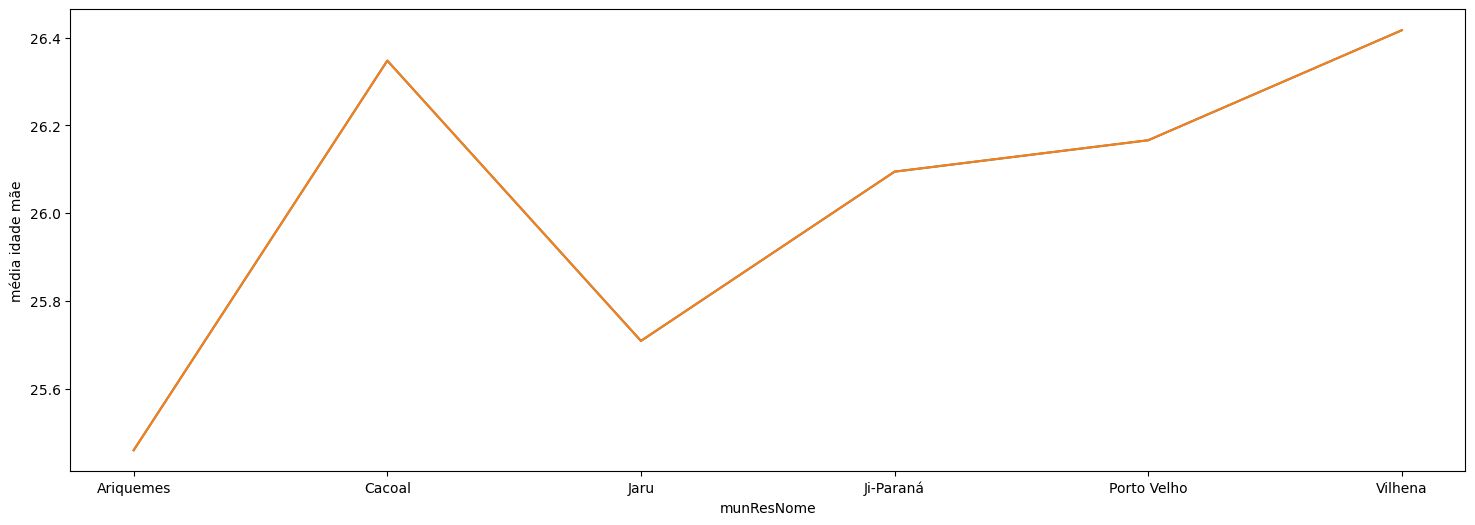

In [17]:
resultado.plot(figsize=[18, 6])
plt.ylabel('média idade mãe');
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.